# 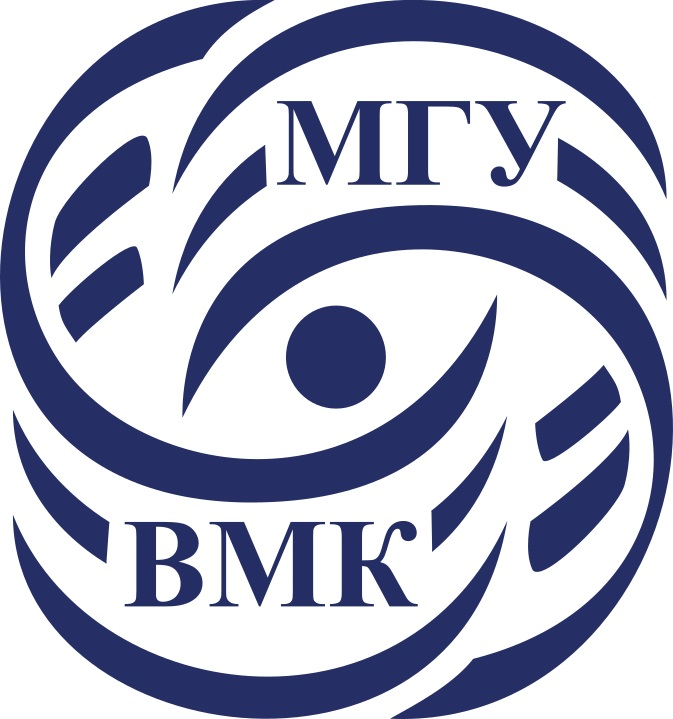

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [ ]:
from sklearn.metrics import mean_squared_error
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Проверим версию библиотеки:

In [ ]:
import catboost

assert (catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Потому что в случае, если бы коэффициент $b$ также регуляризовывался, то модели было бы сложно подстраиваться под новые данные, так как они могут быть смещены относительно оси Y на другое значение

Если говорить конкретнее, то:
1. Смещение $b$ независимо от значений признаков и добавляется отдельно ==> его резуляризация не несёт пользы
2. Регуляризация применяется, чтобы снизить сложность модели и избежать переобучения, однако $b$ не влияет на сложность модели, а значит не требует регуляризации

-----
<font color="white" style="opacity:0.2023"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [3]:
from sklearn.linear_model import Ridge

In [4]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

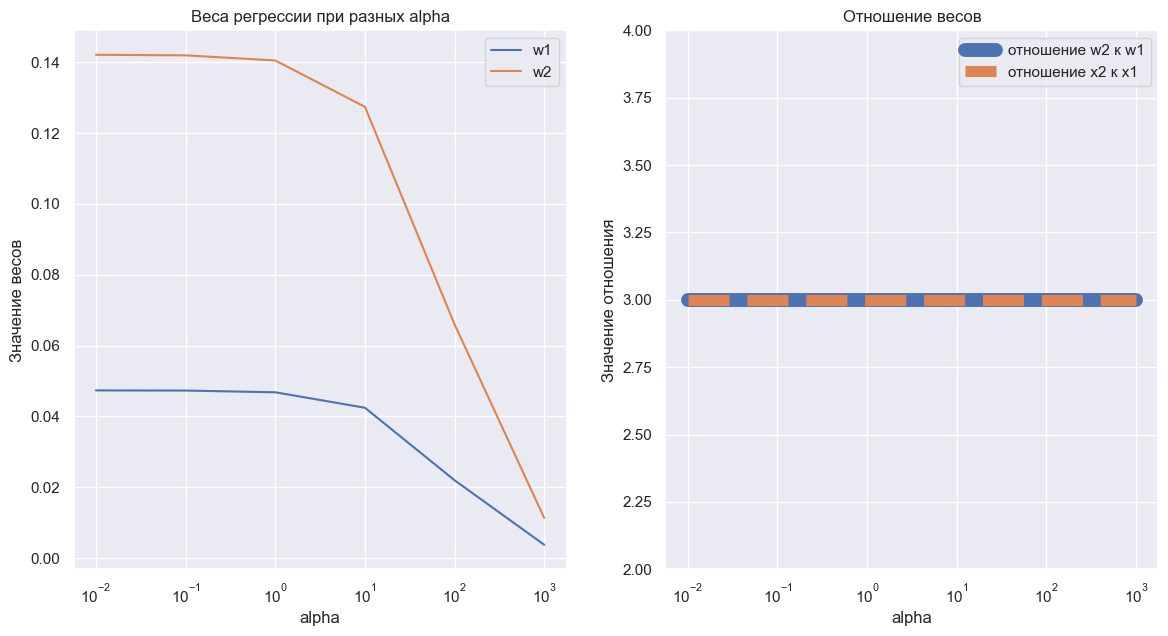

In [5]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2, 4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

Функция потерь имеет следующий вид:
$J(w) = \sum_{i=1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i}))^2 + \alpha (w_1^2 + w_2^2)$

Считая производные, получим:
1. $\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} x_{1i} (y_i - (w_1 x_{1i} + w_2 x_{2i})) + 2 \alpha w_1 = 0$
2. $\frac{\partial J}{\partial w_2} = -2 \sum_{i=1}^{n} x_{2i} (y_i - (w_1 x_{1i} + w_2 x_{2i})) + 2 \alpha w_2 = 0$

Если рассматривать конкретно наши данные ($x_2=3*x_1$), то получим:
1. $\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} x_{1i} (y_i - (w_1 x_{1i} + 3 w_2 x_{1i})) + 2 \alpha w_1 = 0$
2. $\frac{\partial J}{\partial w_2} = -2 \sum_{i=1}^{n} 3 x_{1i} (y_i - (w_1 x_{1i} + 3 w_2 x_{1i})) + 2 \alpha w_2 = 0$

Если произвести следующие вычисления: $3\frac{\partial J}{\partial w_1} -\frac{\partial J}{\partial w_2}=6 \alpha w_1- 2\alpha w_2$

Получаем, что веса зависят друг от друга также, как и коэффициенты, т.е. 1 к 3.

Это объясняет постоянство отношения весов с ростом $\alpha$

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Изначальная функция имеет вид: $J(w) = \sum_{i=1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i}))^2 + \alpha (|w_1| + |w_2|)$

Снова возьмём производную:
1. $\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} x_{1i} \left( y_i - (w_1 + 3w_2) x_{1i} \right) + \alpha \cdot \text{sign}(w_1)$
2. $\frac{\partial J}{\partial w_2} = -2 \sum_{i=1}^{n} 3x_{1i} \left( y_i - (w_1 + 3w_2) x_{1i} \right) + \alpha \cdot \text{sign}(w_2)$
    * $\text{sign}(w_i)$ - знак $i-го$ веса


Почему у нас зануляются веса:
1. Во всех точках, кроме $w_i=0$ у нас идёт постоянное стремление к уменьшению весов
2. Так как в точке 0 у нас не определена производная, то это потенциальная точка для остановки
3. Так как веса получаются линейно зависимыми, то вес может занулится, а весь вклад, который он вносил,перейдёт на первый вес




-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [6]:
from sklearn.linear_model import Lasso

In [7]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.15775309519543243

Веса, при alpha = 0.00001
w1: 0.39668731991454986 	w2: 0.025639365702912618



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Так как штраф за наличие весов (коэф. $\alpha$) весьма низок, то модель не считает его значительным, чтобы занулять. 

Пояснение:
1. Оба веса вносят некоторый вклад в улучшение качества модели
2. Если коэффициент $\alpha$ не вносит достаточного штрафа, то модель не будет искать имеющуюся зависимость между весами, предпочитая оставить вес ненулевым
3. Хоть вес $w_2$ и не ноль, он всё равно весьма мал, так что основной вклад, как и раньше, вносится вторым весов
4. При увеличении числа итераций, веса могут занулиться, так как даже с практически отсутствующей регуляризацией модель сможет найти зависимость.
    * При выполнении приведённого ниже кода видно, что при увеличении числа итераций модель всё-таки зануляет один из весов ==> она дообучилась.
    * Изначально кол-ва итераций не хватило, так как модель была слишком сложной для таких простых данных (из-за малого $\alpha$ и слабой регуляризации, которая как раз и уменьшает сложность модели)

In [8]:
reg = Lasso(alpha=0.00001, max_iter=10000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 0.00001
w1: 0.0 	w2: 0.15786847234109586



-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

MSE для нашей модели:  805.0142195307291


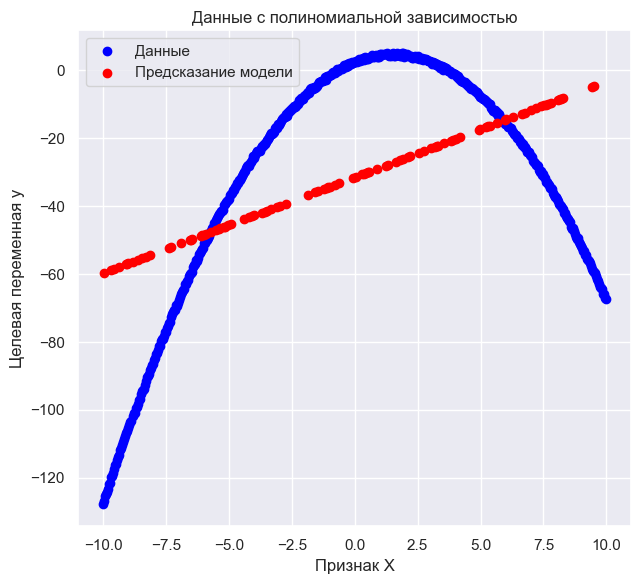

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def generate_polynomial_data(n_samples):
    X = np.linspace(-10, 10, n_samples)
    coeffs = [-1, 3, 2]  # Коэффициенты для x^2, x^1, x^0
    y = np.polyval(coeffs, X) + np.random.uniform(0, 1, n_samples)
    X = X.reshape(-1, 1)
    return X, y


# Генерация 500 образцов
X4, Y4 = generate_polynomial_data(500)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=50)

reg = Ridge(alpha=0.1)
reg.fit(X4_train, Y4_train)
Y4_pred = reg.predict(X4_test)
print("MSE для нашей модели: ", mean_squared_error(Y4_test, Y4_pred))

plt.figure(figsize=(18, 6))

# Линейная регрессия без полинома
plt.subplot(1, 3, 1)
plt.scatter(X4, Y4, color='blue', label='Данные')
plt.scatter(X4_test, Y4_pred, color='red', label='Предсказание модели')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.title('Данные с полиномиальной зависимостью')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


In [67]:
X1 = np.random.randn(100, 1)
X2 = np.ones((100, 1))*10
Y = 3 * X1
X = np.hstack((X1, X2))
ridge = Ridge(alpha=0.5)
ridge.fit(X, Y)

print("Коэффициенты Ridge-регрессии:")
print(f"w1 (X1): {ridge.coef_[0][0]:.4f}")
print(f"w2 (X2): {ridge.coef_[0][1]}")

Коэффициенты Ridge-регрессии:
w1 (X1): 2.9841
w2 (X2): 0.0


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

В случае, если один из признаков является константным, то модель занулит его.

Это связано с тем, что при взятии производной, мы будем получать 0, что и приведёт к занулению признака.

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
